In [1]:
import numpy as np

from matplotlib import pyplot as plt

from hilde.trajectory import reader
from hilde.harmonic_analysis import HarmonicAnalysis, parse_tdep_forceconstant, compute_sed
from hilde.konstanten import omega_to_THz

In [2]:
fcs, lps = parse_tdep_forceconstant('outfile.forceconstant')

Parse force constants from
  outfile.forceconstant
.. remap representation for supercell:  False
.. Number of atoms:   2
.. Real space cutoff: 3.660 \AA
.. Number of lattice points: 54 (33 unique)
.. time elapsed: 0.002s


In [3]:
traj = reader('trajectory.yaml')

.. trajectory.yaml parsed in 2.993s


In [4]:
ha = HarmonicAnalysis(traj.primitive, traj.supercell, fcs, lps)

Set up harmonic analysis for MgO:
.. found 32 (31) lattice points in 0.001s
.. time elapsed: 0.073s


In [5]:
seq = compute_sed(traj[:], traj.supercell, traj.primitive, ha.q_points * 2 * np.pi)
seq.shape

(32, 7500)

In [6]:
tmax = traj[-1].info['nsteps'] * traj[-1].info['dt']

In [7]:
xs = np.arange(len(traj)) / tmax * 1000

In [8]:
omegas = ha.omegas(ha.irreducible_q_points_frac)
omegas

.. number of q points reduced from 32 to 8 in 0.171s


array([[-1.05367121e-08, -1.05367121e-08,  1.49011612e-08,
         8.64532304e-01,  8.64532304e-01,  8.64532304e-01],
       [ 4.07899734e-01,  4.07899734e-01,  6.25608492e-01,
         8.57692642e-01,  8.57692642e-01,  9.73453363e-01],
       [ 5.69135704e-01,  5.69135704e-01,  8.55982575e-01,
         8.55982575e-01,  8.60974213e-01,  1.09055131e+00],
       [ 4.07899734e-01,  4.07899734e-01,  6.25608492e-01,
         8.57692642e-01,  8.57692642e-01,  9.73453363e-01],
       [ 4.93643072e-01,  6.39455934e-01,  6.84511015e-01,
         7.68728084e-01,  8.88203600e-01,  1.04519729e+00],
       [ 6.45980275e-01,  7.72136036e-01,  7.72136036e-01,
         7.99581830e-01,  9.47315224e-01,  9.47315224e-01],
       [ 4.98947521e-01,  4.98947521e-01,  6.80654233e-01,
         6.80654233e-01,  9.66798268e-01,  1.11096897e+00],
       [ 4.93643072e-01,  6.39455934e-01,  6.84511015e-01,
         7.68728084e-01,  8.88203600e-01,  1.04519729e+00]])

0
[0. 0. 0.]
[-1.64723663e-07 -1.64723663e-07  2.32954439e-07  1.35154996e+01
  1.35154996e+01  1.35154996e+01]
1
[0.   0.25 0.25]
[ 6.37682208  6.37682208  9.78033009 13.40857304 13.40857304 15.21829601]
2
[0.  0.5 0.5]
[ 8.89747362  8.89747362 13.38183903 13.38183903 13.45987485 17.04892431]
3
[0.   0.75 0.75]
[ 6.37682208  6.37682208  9.78033009 13.40857304 13.40857304 15.21829601]
4
[0.25 0.25 0.5 ]
[ 7.71727407  9.99681142 10.70117137 12.01776273 13.88556023 16.33989088]
5
[0.25 0.5  0.75]
[10.09880844 12.07104028 12.07104028 12.50010883 14.80967044 14.80967044]
6
[0.5 0.5 0.5]
[ 7.80020015  7.80020015 10.6408771  10.6408771  15.11425487 17.36811989]
7
[0.5  0.75 0.75]
[ 7.71727407  9.99681142 10.70117137 12.01776273 13.88556023 16.33989088]


(0, 25)

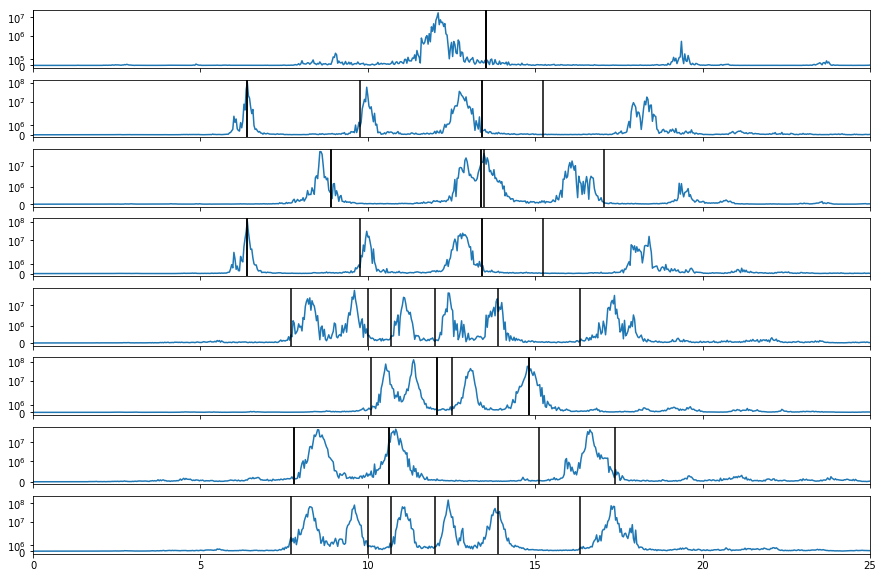

In [9]:
mapping = ha.irreducible_q_points_mapping

n_unique = len(np.unique(mapping))

fig, axs = plt.subplots(nrows=n_unique, sharex=True, figsize=(15, 10))

for ii in np.unique(mapping):
    print(ii)
    print(ha.irreducible_q_points_frac[ii])
    print(omegas[ii] * omega_to_THz)
    spec = seq[mapping == ii]
    s = spec.sum(axis=0)
    axs[ii].plot(xs, s)
    axs[ii].set_yscale('symlog', linthreshy=s.max() / 50)
    for w in (omegas[ii] * omega_to_THz):
        axs[ii].axvline(w, color='k')


plt.xlim([0, 25])